In [373]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [374]:
df = pd.read_csv('train.csv')
df.head(5)
#df.columns

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
0,1,1500,2.0,1.0,2.0,23.0,0.0,0.0,0.0,2.0,...,1463,938.0,698.0,75,150,86,0,50.0,50.0,yes
1,2,8500,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,...,8364,8275.0,8425.0,300,400,315,300,325.0,305.0,no
2,3,1000,1.0,1.0,2.0,22.0,0.0,0.0,0.0,0.0,...,933,772.0,794.0,150,150,150,24,105.0,110.0,no
3,4,10500,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,...,7190,7229.0,7340.0,255,260,258,260,265.0,307.0,no
4,5,10500,2.0,2.0,1.0,44.0,0.0,0.0,0.0,0.0,...,3558,3592.0,3496.0,180,155,145,130,135.0,200.0,no


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24001 entries, 0 to 24000
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  24001 non-null  int64  
 1   limit_bal    24001 non-null  int64  
 2   sex          24001 non-null  float64
 3   education    24001 non-null  float64
 4   marriage     24001 non-null  float64
 5   age          24001 non-null  float64
 6   pay_1        24001 non-null  float64
 7   pay_2        24001 non-null  float64
 8   pay_3        24001 non-null  float64
 9   pay_4        24001 non-null  float64
 10  pay_5        23819 non-null  float64
 11  pay_6        22790 non-null  float64
 12  bill_amt1    24001 non-null  int64  
 13  bill_amt2    24001 non-null  int64  
 14  bill_amt3    24001 non-null  int64  
 15  bill_amt4    24001 non-null  int64  
 16  bill_amt5    23819 non-null  float64
 17  bill_amt6    22790 non-null  float64
 18  pay_amt1     24001 non-null  int64  
 19  pay_

In [376]:
df[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].describe()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
count,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,22790.000000
mean,-0.015874,-0.132119,-0.166201,-0.215824,-0.263403,-0.286529
std,1.123554,1.199237,1.196802,1.173350,1.135120,1.152145
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


### pay_1 to pay_6 have label -2 which is not documented. Since months of delay cannot be negative. We convert all negative values to 0.

In [377]:
fil = (df.pay_1 == -2) | (df.pay_1 == -1) | (df.pay_1 == 0)
df.loc[fil, 'pay_1'] = 0
fil = (df.pay_2 == -2) | (df.pay_2 == -1) | (df.pay_2 == 0)
df.loc[fil, 'pay_2'] = 0
fil = (df.pay_3 == -2) | (df.pay_3 == -1) | (df.pay_3 == 0)
df.loc[fil, 'pay_3'] = 0
fil = (df.pay_4 == -2) | (df.pay_4 == -1) | (df.pay_4 == 0)
df.loc[fil, 'pay_4'] = 0
fil = (df.pay_5 == -2) | (df.pay_5 == -1) | (df.pay_5 == 0)
df.loc[fil, 'pay_5'] = 0
fil = (df.pay_6 == -2) | (df.pay_6 == -1) | (df.pay_6 == 0)
df.loc[fil, 'pay_6'] = 0

In [378]:
df[['sex', 'education', 'marriage']].describe()

,sex,education,marriage
count,24001.000000,24001.000000,24001.000000
mean,1.604058,1.856839,1.551644
std,0.489062,0.792152,0.522663
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


### Again we have undocumented labels, since education and marriage have others as option we convert the undocument labels as others(eduction=4,marriage=3)

In [379]:
update = (df.education == 5) | (df.education == 6) | (df.education == 0)
df.loc[update, 'education'] = 4
df['education'].unique()

array([1., 2., 3., 4.])

In [380]:
df.loc[df.marriage == 0, 'marriage'] = 3
df['marriage'].unique()

array([2., 1., 3.])

In [381]:
df[['bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']].describe()

,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,24001.000000,24001.000000,24001.000000,23819.000000,22790.000000
mean,2467.107037,2359.795592,2175.804383,2024.383559,1960.335981
std,3585.952168,3499.639871,3244.170936,3063.487512,3015.469078
min,-3488.000000,-3075.000000,-8500.000000,-4066.000000,-10452.000000
25%,147.000000,130.000000,116.000000,90.000000,62.000000
50%,1059.000000,1007.000000,953.000000,906.000000,855.500000
75%,3202.000000,3015.000000,2752.000000,2510.500000,2466.000000
max,49196.000000,83204.000000,44579.000000,46358.000000,48083.000000


In [382]:
df[['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,22790.000000
mean,281.079955,298.237073,263.109704,243.367943,238.731139,256.517069
std,846.819525,1215.481369,899.406651,782.138847,779.341974,861.106314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,41.000000,19.000000,15.000000,12.000000,6.000000
50%,105.000000,100.000000,90.000000,75.000000,75.000000,75.000000
75%,250.000000,250.000000,227.000000,200.000000,200.000000,200.000000
max,43677.000000,84212.000000,44802.000000,31050.000000,21326.000000,26433.000000


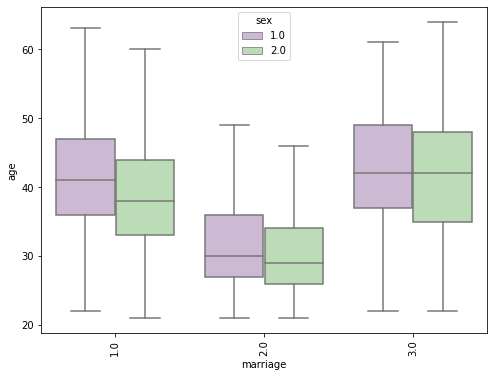

In [383]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();
df.dropna(axis = 0, how ='any',inplace=True) 
boxplot_variation('marriage','age', 'sex',8)

#### males with others and married as marraige status have higher age

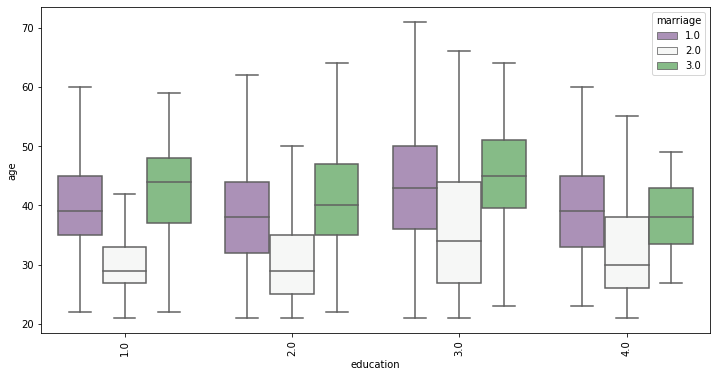

In [384]:
boxplot_variation('education','age', 'marriage',12)

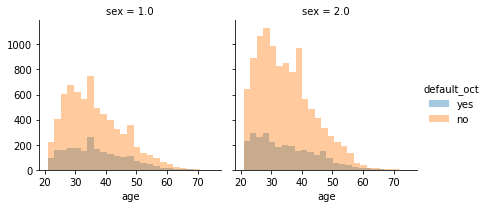

In [385]:
g = sns.FacetGrid(df, col='sex', hue='default_oct')
g.map(plt.hist, 'age', alpha=0.4, bins=25)
g.add_legend()

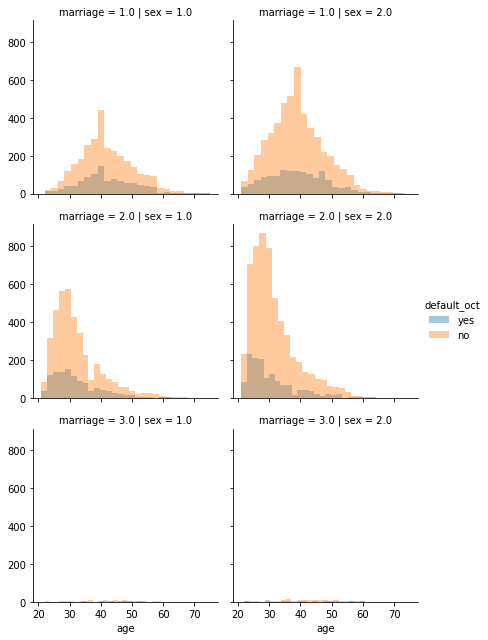

In [386]:
g = sns.FacetGrid(df, col='sex', row= "marriage", hue='default_oct')
g.map(plt.hist, 'age', alpha=0.4, bins=25) 
g.add_legend()

# PREDICTIVE MODELS

## 1. XGBOOST

#### defining features and labels

In [387]:
x=df.drop(['default_oct'], axis=1)
y=df['default_oct']
predictor=['customer_id', 'limit_bal', 'sex', 'education', 'marriage', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1',
       'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
test = pd.read_csv('test.csv')
test.dropna(axis = 0, how ='any',inplace=True) 

### Running GridSearchCV to find the optimum hyperparameters for XGBOOST (might take few minutes while to run)

In [388]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
#define the model with default hyperparameters
model = AdaBoostClassifier()
#define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
#define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
#execute the grid search
grid_result = grid_search.fit(x, y)
#summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.817157 using {'learning_rate': 0.0001, 'n_estimators': 10}


In [389]:
s1=grid_result.best_score_
s1

0.8171566476524792

### building xgboost model on hyperparameters values that give the best score(learning_rate=0.0001,n_estimators=10)

In [390]:
clf = AdaBoostClassifier(random_state=2018,
                         algorithm='SAMME.R',
                         learning_rate=0.0001,
                             n_estimators=10)

In [391]:
clf.fit(x,y.values)

AdaBoostClassifier(learning_rate=0.0001, n_estimators=10, random_state=2018)

In [392]:
preds = clf.predict(test)
preds

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

# 2. RandomForest

### Running GridSearchCV to find the optimum hyperparameters for RandomForest (might take few minutes while to run)

In [393]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
#Maximum number of levels in tree
model = RandomForestClassifier()
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Method of selecting samples for training each tree
bootstrap = [True, False]
#Create the random grid
random_grid = {'n_estimators': [10, 50, 100, 500],
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=2018, n_jobs = -1)
#Fit the random search model
rf_random.fit(x, y)
rf_random.best_params_

Fitting 2 folds for each of 100 candidates, totalling 200 fits


{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': None,
 'bootstrap': True}

In [394]:
s2=rf_random.best_score_
s2

0.8131197893813076

### building Random Forest model on hyperparameters values that give the best score

In [395]:
clf = RandomForestClassifier(n_jobs=4, 
                             n_estimators= 500,
                             min_samples_split= 5,
                             min_samples_leaf= 4,
                             max_depth= None,
                             bootstrap= True,
                             random_state=2018,
                             criterion='gini',
                             verbose=False)

In [396]:
clf.fit(x,y.values)

RandomForestClassifier(max_depth=60, min_samples_leaf=2, min_samples_split=10,
                       n_jobs=4, random_state=2018, verbose=False)

# 3. Decision Trees

### Running GridSearchCV to find the optimum hyperparameters for Decision Trees (might take few minutes while to run)

In [397]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
param_dict= {
"criterion": ['gini', 'entropy'],
"max_depth": range (1,10),
"min_samples_split":range (1,10),
"min_samples_leaf":range (1,5)
}
grid = GridSearchCV (decision_tree, param_grid=param_dict, cv=2, verbose=1,n_jobs=-1)
grid.fit(x,y)
grid.best_params_

Fitting 2 folds for each of 648 candidates, totalling 1296 fits


C:\Users\rudra\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
144 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rudra\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rudra\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\rudra\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
Value

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [398]:
s3=grid.best_score_
s3

0.8179903466432645

### building Decision Tree model on hyperparameters values that give the best score

In [399]:
dt = DecisionTreeClassifier(criterion = 'gini',  max_depth= 3,
 min_samples_leaf= 1,
 min_samples_split=2,random_state=2018)
dt.fit(x, y)
pred_f= dt.predict(test)

# 4. Bagging Classifier (Decision Tree as  base estimator)

### Running GridSearchCV to find the optimum hyperparameters for bagging with DT (might take few minutes while to run)

In [400]:
from sklearn.ensemble import BaggingClassifier
bc_params = {
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7],
          'max_samples': [0.5, 0.7],
          'n_estimators': [50, 100],
}
bcg = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=2, verbose=1)
bcg.fit(x,y)
bcg.best_params_

Fitting 2 folds for each of 16 candidates, totalling 32 fits


{'bootstrap_features': True,
 'max_features': 0.7,
 'max_samples': 0.5,
 'n_estimators': 100}

In [401]:
s4=bcg.best_score_
s4

0.8047827994734533

### building Bagging Classifier model on hyperparameters values that give the best score

In [402]:
bc = BaggingClassifier(base_estimator=dt, 
          bootstrap_features= True,
          max_features= 0.7,
          max_samples= 0.5,
          n_estimators= 100,random_state=2018)
bc = bc.fit(x, y)
pred = bc.predict(test)

## Out of the 4 predictive models Decision Trees gives the best score. Therefore I chose to save its predicted values in predictions csv

In [403]:
models = pd.DataFrame({'score': [s1,s2,s3,s4]}, 
                        index=["ADAboost","RandomForest","Decision Trees","Bagging_DT"])
models

,score
ADAboost,0.817157
RandomForest,0.813120
Decision Trees,0.817990
Bagging_DT,0.804783


In [404]:
test['pr_y'] = pred

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,pr_y
0,24002,10500,1.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,1741,881.0,120.0,99,1053,724,884,120.0,24.0,no
1,24003,27500,2.0,5.0,2.0,52.0,-2.0,-2.0,-2.0,-2.0,...,987,23.0,409.0,300,300,987,23,409.0,0.0,no
2,24004,27500,2.0,2.0,1.0,32.0,2.0,0.0,0.0,0.0,...,27401,26533.0,7754.0,1054,1143,8381,700,215.0,7903.0,no
3,24005,9000,2.0,2.0,1.0,32.0,1.0,2.0,2.0,2.0,...,858,936.0,1169.0,0,150,0,100,250.0,100.0,no
4,24006,500,1.0,3.0,2.0,42.0,1.0,2.0,2.0,2.0,...,294,220.0,259.0,0,129,0,50,50.0,17.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,29996,17500,1.0,1.0,1.0,42.0,2.0,-1.0,-1.0,-1.0,...,33,33.0,1536.0,33,33,33,33,1536.0,41.0,no
5995,29997,10000,2.0,2.0,1.0,28.0,0.0,0.0,0.0,0.0,...,4852,5177.0,181.0,250,100,4450,325,4.0,75.0,no
5996,29998,3000,2.0,2.0,1.0,29.0,0.0,0.0,0.0,0.0,...,2551,1210.0,264.0,109,114,71,8,21.0,1467.0,no
5997,29999,1500,1.0,3.0,2.0,37.0,1.0,2.0,2.0,0.0,...,1231,1246.0,1263.0,69,0,84,50,75.0,25.0,no


In [405]:
useful_columns = ['customer_id','pr_y']
test.loc[:,useful_columns].to_csv('Rudraksh_predictions.csv',index=False)